# Qiskit 101

The content of this page is fully based on the Link: https://learning.quantum.ibm.com/course/qiskit-101-and-102/qiskit-101 

### What is Qiskit?
- *(**my own understanding, later will be shorted as m.o.u.**) a platform to implement and experiment with the quantum circuit model by expressing associated quantum algorithms as quantum circuits.*
- Qiskit SDK
- Qiskit Runtime
- Qiskit Patterns
- Qiskit Ecosystem 

### Getting set up with Qiskit 
pip install 'qiskit[visualization]' <br>
pip install qiskit-ibm-runtime <br>
IBM hardware: setup credentials on IBM Quantum Platform or IBM cloud

### Qiskit Patterns
1. Map problem to quantum circuits and operators
- Start with numerical representation
- Map to quantum computing representation
- Choose quantum algorithm 

2. Optimize circuits for target hardware
3. Execute on target hardware
4. Postprocessing results (& plot)

### 1. Map problem to quantum circuits and operators
#### Build a circuit with Qiskit SDK
- quantum circuit: the foundation of quantum programs, consists of operations (gates, measurement, reset)
- To build a circuit: 
    - initialize a register of qubits
    - add the qubits to a circuit
    - perform operations on those qubits
- Qiskit SDK includes a library of standard gates and circuits
    - gates: Hadamard, Pauli rotation gates, CNOT, QFT etc
    - variational ansatzes

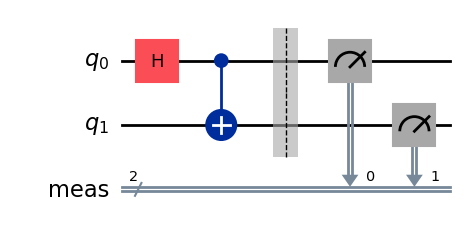

In [1]:
from qiskit import QuantumCircuit, QuantumRegister

qubits = QuantumRegister(2, name='q')
circuit = QuantumCircuit(qubits)

q0, q1 = qubits
circuit.h(q0)
circuit.cx(q0, q1)
circuit.measure_all()

circuit.draw('mpl')

### 2. Optimize circuits for target hardware
#### Optimize for hardware techniques
- transpile abstract circuit into a circuit that can run on target hardware
- test circuit with simulation 
#### Constraints on real quantum devices
- basis gate set: only a limited set of gates can be executed directly on the hardware. Other gates must be rewritten in terms of the basis gates.
- qubit connectivity: only certain pairs of qubits can be directly interacted with each other. 
    - *(**m.o.u**: why is qubit connectivity one of the constraints? -- see other jupyter notebook 'Questions_Clarified_with_GPT'.)*
- errors: each operation has a chance of error.
#### Challenge: run abstract circuit on a quantum device
- solution: transpilation - convert abstract circuit into an ISA (instruction set architecture) circuit 
#### Transpilation terms
- pass: a standalone circuit or metadata transformation 
    - *(**m.o.u**: is a transpiler pass a real physical circuit unit that representing one gate from the abstract circuit passed to the transpiler? Answer is: No -- -- see other jupyter notebook 'Questions_Clarified_with_GPT' for more details)*
- pass manager: a list of transpiler passes grouped into a logical unit
- staged pass manager: a list of pass managers, with each one representing a discreate stage of a transoilation pipeline

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
pass_manager = generate_preset_pass_manager(1, backend=backend)
transpiled = pass_manager.run(circuit)

transpiled.draw("mpl", idle_wires=False)

#### Transpiler stages
1. Initialization: prepare a circuit for transpilation
2. Layout: map abstract qubits to physical qubits 
3. Routing: insert SWAP gates to enable interactions between qubits
4. Translation: gates are translated to basis gate set of the physical device
5. Optimizatioon: rewwrite circuit to minimze # of operations to reduct errors
6. Scheduling: deplay instructions to aligh the circuit with the hardware's timing

#### Additional transpilation tools
- Qiskit transpiler service
- Qiskit Ecosystem
- Write your own transpiler plugins

#### Simulation tools
- Qiskit SDK reference primitives: exact simulation, but only small circuits and no noise
- Qiskit Runtime local testing: provide 'fake' backends to model each quantum machine
- Qiskit Aer: ecosystem project for simulation for larger circuits, noise models, stabilizer circuits

##### Runtime cost of simulating quantum circuits scales exponentially with # of qubits
- techniques for large circuits:
    - test smaller versions of circuit
    - modify circuit to make it classically simulatable (stabilizer circuit/Clifford circuit)

### 3. Execute on target hardware
Primitives: encapsulate output
- Sampler primitive (has measurements)
    - output is a probability distribution over possible measurement outcomes
- Estimator primitives (should not include measurements)
    - output is the expectation value of observable 

### 4. Post-processing